## Gradient Method

The key idea behind the gradient method is that for any differentiable function $C(\textbf{W}) \in \mathbb{R}^N\rightarrow\mathbb{R}$, its first derivative is equal to zero at local minimums/maximums. To find a local minimum $\textbf{W}_{minimum} \in \mathbb{R}^N$, we can iteratively move opposite to the direction of the first derivative until the derivative is equal to zero.

$$ \textbf{W}_{t+1} = \textbf{W}_{t} - \alpha \nabla_{\textbf{W}_{t}} $$

$$ \nabla_{\textbf{W}_t} = \frac{\partial C(\textbf{W}_t)}{\partial \textbf{W}_t} $$

Here, $\alpha \in \mathbb{R}$ is the learning rate, which determines the ratio between the magnitude of the derivative at $ \textbf{W}_{t}$ and the magnitude of the jump from $\textbf{W}_{t}$ to $\textbf{W}_{t+1}$.

### Example 1: Quadratic Function

Given function $\text{Q}(\textbf{X}) \in \mathbb{R}^N \rightarrow \mathbb{R}$ defined as:
$$ \text{Q}(\textbf{X}) = \sum_i^N {x_i^2} $$

And its first derivative $\nabla_{\textbf{X}}{\text{Q}(\textbf{X})} \in \mathbb{R}^N \rightarrow \mathbb{R}^N$ defined as:
$$ \nabla_{\textbf{X}}{\text{Q}(\textbf{X})} = 2\textbf{X} $$

Find $\textbf{X}_{minimum}$ such that $\text{Q}(\textbf{X})$ has the lowest possible value, 
$\textbf{X}_{minimum} = \text{argmin}_\textbf{X}\text{Q}(\textbf{X})$.

In [2]:
import numpy as np

def Q(X: np.array) -> float:
    return np.sum(X**2)

def dQ(X: np.array) -> np.array:
    return 2*X

In [3]:
X1 = np.array([50., 50.])
print(f'X1     = {X1}')
print(f'Q(X1)  = {Q(X1)}')
print(f'dQ(X1) = {dQ(X1)}')

X1     = [50. 50.]
Q(X1)  = 5000.0
dQ(X1) = [100. 100.]


In [4]:
from typing import Callable
import pandas as pd

def gradient_descent(
    start: np.array, 
    derivative: Callable[[np.array], np.array], 
    learning_rate: float, 
    iterations: int
    ):
    
    current = start
    X_current_history = []
    X_gradient_history = []
    
    for i in range(iterations):
        X_current_history.append(current)
        
        gradient = derivative(current)
        step = -learning_rate * gradient
        current = current + step
        
        X_gradient_history.append(gradient)

    X_current_history = np.array(X_current_history)
    X_gradient_history = np.array(X_gradient_history)
    
    history = pd.DataFrame({
        'x0': X_current_history[:, 0],
        'x1': X_current_history[:, 1],
        'dx0': X_gradient_history[:, 0],
        'dx1': X_gradient_history[:, 1],
    })

    return current, history

In [5]:
X_minimal, history = gradient_descent(X1, dQ, 0.1, 20)
print(f'X_minimal = {X_minimal}')
history

X_minimal = [0.57646075 0.57646075]


,x0,x1,dx0,dx1
0,50.000000,50.000000,100.000000,100.000000
1,40.000000,40.000000,80.000000,80.000000
2,32.000000,32.000000,64.000000,64.000000
3,25.600000,25.600000,51.200000,51.200000
4,20.480000,20.480000,40.960000,40.960000
5,16.384000,16.384000,32.768000,32.768000
6,13.107200,13.107200,26.214400,26.214400
7,10.485760,10.485760,20.971520,20.971520
8,8.388608,8.388608,16.777216,16.777216
9,6.710886,6.710886,13.421773,13.421773


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

def cross(aa, bb):
    return np.array([[b, a] for a in aa for b in bb])

def evaluate_on_square(f, location=(0, 0), side=200, n=100):
    xd = np.linspace(location[0]-side/2, location[1]+side/2, n)
    xx = cross(xd, xd)
    fs = np.array([f(x) for x in xx])

    return fs

def evaluate_on_square_tf(f, location=(0, 0), side=200, n=100):
    xd = np.linspace(location[0]-side/2, location[1]+side/2, n)
    xx = cross(xd, xd)
    
    x_placeholder = tf.placeholder(dtype=float, shape=xx[0].shape)
    f_tensor = f(x_placeholder)
    
    with tf.Session() as s:
        fs = [s.run(f_tensor, feed_dict={x_placeholder: x}) for x in xx]

    return np.array(fs)
    
def plot_learning_path(field, paths, location, side):
    n = np.sqrt(field.shape[0]).astype(int)
    min_x, max_x = location[0]-side/2, location[0]+side/2
    min_y, max_y = location[1]-side/2, location[1]+side/2
    
    plt.figure(figsize=[8, 8], dpi=100)
    plt.imshow(
        field.reshape(n, n), 
        extent=[min_x, max_x, max_y, min_y],
        cmap=plt.get_cmap('Greens').reversed()
    )

    for history in paths:
        # Plotting each step as a point
        sns.scatterplot(history['x0'], history['x1'], color='red')
        
        # Last point's color will be blue
        sns.scatterplot(history['x0'].tail(1), history['x1'].tail(1), color='blue')

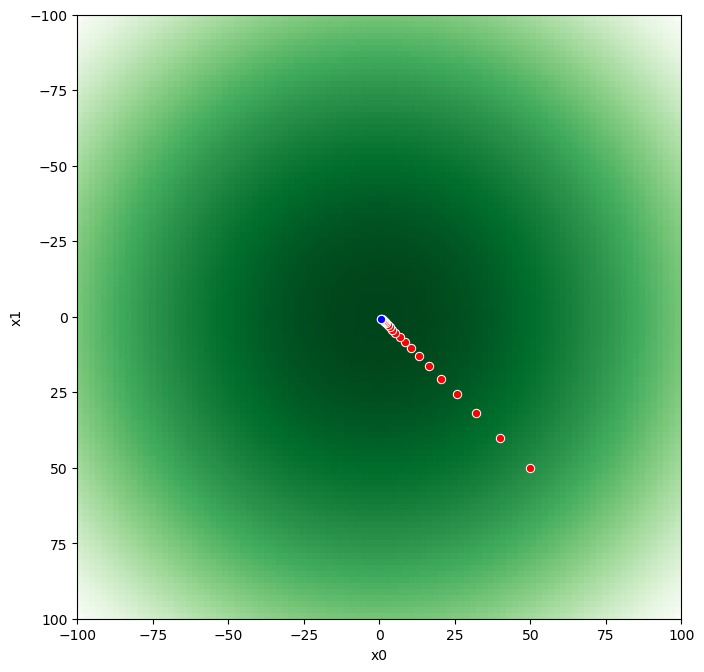

In [7]:
plot_learning_path(
    evaluate_on_square(Q, location=[0,0], side=200), 
    [history], 
    location=[0, 0],
    side=200
)

### Example 2: Finding gradients with backpropagation

Given a computation graph that evaluates $y$ from $x$, and a particular value $x = x_0$,
the backpropagation algorithm evaluates the value of $\nabla_{x} y(x)$ at point $x_0$.
This calculation is possible for any function using the chain rule.

In Calculus, the chain rule explains how to take derivatives of composite functions. For example, given two functions:

$
f(x) \in \mathbb{R} \rightarrow \mathbb{R} \\
g(x) \in \mathbb{R} \rightarrow \mathbb{R} 
$

What's the derivative of $f(g(x))$?

$$ z = g(x) $$
$$ \frac{\partial f(g(x))}{\partial x} = \frac{\partial f(z)}{\partial z} \frac{\partial g(x)}{\partial x} $$

In the multi-path case:
$$ \frac{\partial f(g_0(x), ..., g_n(x))}{\partial x} = \sum_i^n{\frac{\partial f}{\partial g_i}\frac{\partial g_i}{\partial x}}  $$

Backpropagation is an efficient way to evaluate the value of a function's derivative
at a particular point. Instead of analyzing the function symbolically, we can
calculate derivatives of its components and multiply them together.

In [11]:
import tensorflow as tf

# Creating a Tensorflow constant
X2 = np.array([50., 50.])
X2_tensor = tf.constant(X2, dtype=tf.float32)

# Evaluating the gradient of Q at X2
with tf.Session() as s:
    gradient_tensor = tf.gradients(ys=Q(X2_tensor), xs=X2_tensor)
    print(s.run(gradient_tensor))

[array([100., 100.], dtype=float32)]


### Example 2: Gradient Descent with Tensorflow

Given function $\text{S}(\textbf{x}) \in \mathbb{R}^2 \rightarrow \mathbb{R}$ defined as:
$$ \text{S}(\textbf{x}) = 3\text{sin}(x_0) + \text{sin}(x_1)^2 $$

Find $\textbf{x}_{minimum}$ such that $\text{S}(\textbf{x})$ has the lowest possible value, $\textbf{x}_{minimum} = \text{argmin}_\textbf{x}{\text{S}(\textbf{x})}$.

In [12]:
import tensorflow as tf

def S(X: tf.Tensor) -> tf.Tensor:
    factors = tf.constant([3., 1.])
    powers = tf.constant([1., 2.])
    
    z = (tf.math.sin(X) * factors) ** powers
    
    return tf.reduce_sum(z)

In [13]:
def tf_gradient_descent(
    optimizer: tf.train.Optimizer,
    loss_factory: Callable[[tf.Tensor], tf.Tensor],
    side: int, 
    iterations: int
    ):
    
    s = tf.Session()
    
    # Random location to start from
    X_start = 0.6 * side * (np.random.rand(2) - 1/2)

    # Constructing the training operation
    X = tf.Variable(X_start, dtype=tf.float32)
    train = optimizer.minimize(loss=loss_factory(X), var_list=[X])
    
    # Initializing the graph
    s.run(tf.global_variables_initializer())

    X_history = []
    for _ in range(iterations):
        s.run(train)
        X_history.append(s.run(X))

    X_history = np.array(X_history)

    history = pd.DataFrame({
        'x0': X_history[:, 0],
        'x1': X_history[:, 1],
    })

    return history
        
def plot_random_train(
    loss_factory: Callable[[tf.Tensor], tf.Tensor],
    optimizer: tf.Tensor,
    experiments: int, 
    iterations: int,
    side: int,
    seed: int
    ):
    
    np.random.seed(seed)
    
    paths = [
        tf_gradient_descent(optimizer, loss_factory, side, iterations) 
        for _ in range(experiments)
    ]

    plot_learning_path(
        evaluate_on_square_tf(loss_factory, location=[0, 0], side=side), 
        paths, 
        location=[0, 0],
        side=side
    )

Instructions for updating:
Colocations handled automatically by placer.


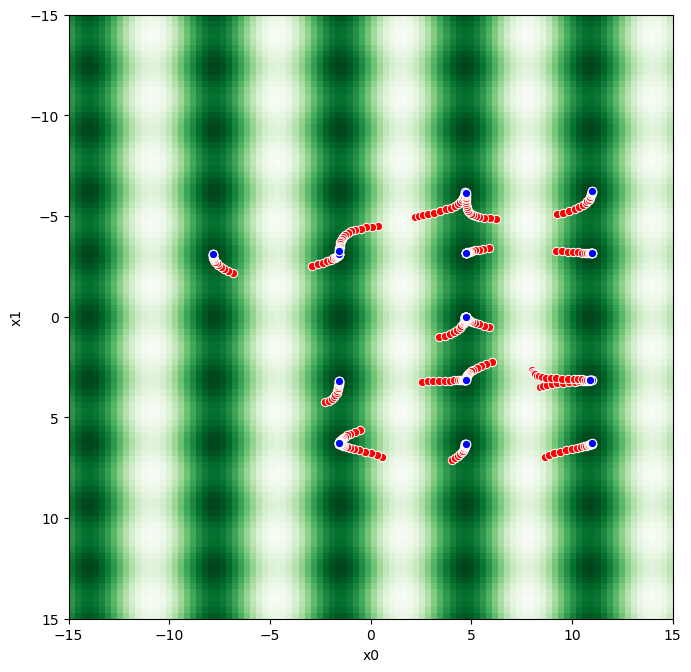

In [14]:
plot_random_train(
    S,
    tf.train.GradientDescentOptimizer(0.1), 
    experiments=20,
    iterations=20,
    side=30,
    seed=24
)

In [2]:
from tensorflow.keras import optimizers
?optimizers.SGD

Init signature: optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False, **kwargs)
Docstring:     
Stochastic gradient descent optimizer.

Includes support for momentum,
learning rate decay, and Nesterov momentum.

Arguments:
    lr: float >= 0. Learning rate.
    momentum: float >= 0. Parameter that accelerates SGD
        in the relevant direction and dampens oscillations.
    decay: float >= 0. Learning rate decay over each update.
    nesterov: boolean. Whether to apply Nesterov momentum.
File:           /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/optimizers.py
Type:           type
Subclasses:     


### Mini-Batch Gradient Descent

If X = # of observations (batch gradient descent), the cost should be decreasing on every iteration. If it's not the learning rate is probably too big. This might be computationally inefficient, since the gradient might be well estimated on a subset of all observations.

If X = 1 (stochastic gradient descent), the cost might or might not decrease on every iteration. The learning curve will be very noisy. This is computationally inefficient, because the cost is not calculated with vectorized optimizations.

If N > X > 1 (mini-batch gradient descent), the cost might or might not decrease on every iteration. The learning curve will be somewhat noisy. With a well-optimized X, the computitional efficiency will be optimal.

## Momentum

$$
\begin{align}
    \textbf{V}_{t+1} & = \beta \textbf{V}_t + (1 - \beta) \nabla_{\textbf{W}_t} \\
    \textbf{W}_{t+1} & = \textbf{W}_t - \alpha \textbf{V}_{t+1}
\end{align}
$$

Intuitively, this combines the previous-iteration velocity and current-iteration acceleration of the learning process. Usually, $\beta$ is about 0.9, but should be optimized with other hyperparameters.

### Example 3: Momentum with Tensorflow

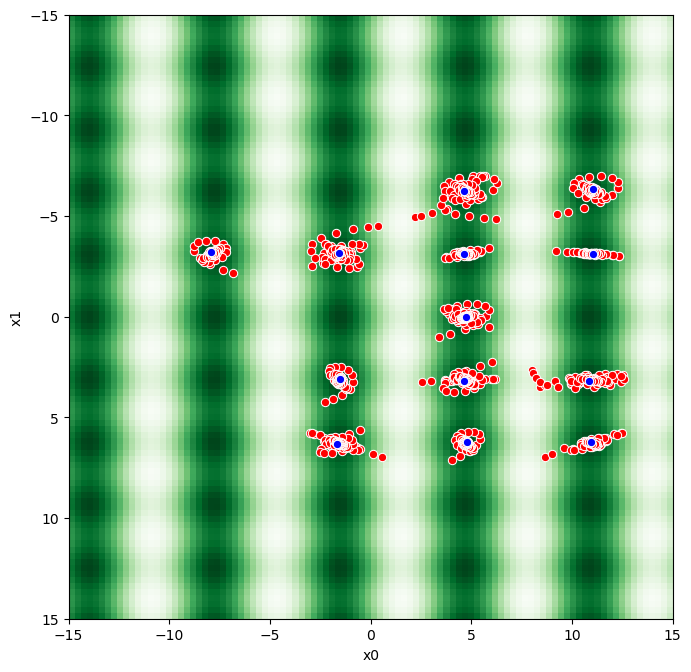

In [15]:
plot_random_train(
    S,
    tf.train.MomentumOptimizer(learning_rate=0.1, momentum=0.9), 
    experiments=20,
    iterations=50,
    side=30,
    seed=24
)

Note that Keras SGD optimizer supports Momentum as a hyperparameter.

## Root Mean Square (RMSprop)

$$ 
\begin{align}
    \textbf{S}_{t+1} & = \gamma \textbf{S}_{t} + (1-\gamma) (\nabla_{\textbf{W}_t})^2 \\
    \textbf{W}_{t+1} & = \textbf{W}_{t} - \alpha \frac{\nabla_{\textbf{W}_t}}{\sqrt{\textbf{S}_{t+1}}} 
\end{align}
$$

The factor $\sqrt{\textbf{S}_{t+1}}$ is small when gradient is small, so we move faster in that direction. When the gradient is large, we move slower in that direction. This helps to avoid overshooting the minimum and getting stuck in the plateaus. 

In particular, learning rate $\alpha$ can be pretty big, but the adjusted factor will prevent oscillations.


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



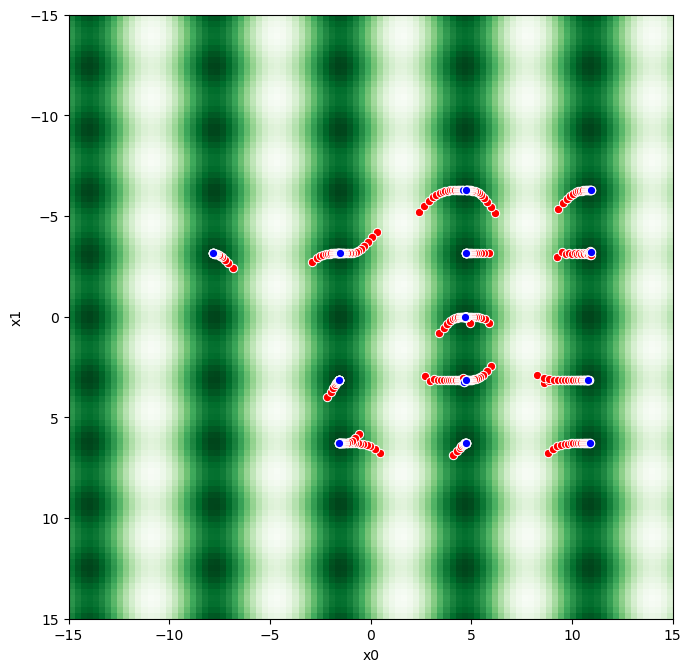

In [16]:
plot_random_train(
    S,
    tf.contrib.optimizer_v2.RMSPropOptimizer(learning_rate=0.1),
    experiments=20,
    iterations=20,
    side=30,
    seed=24
)

In [5]:
from tensorflow.keras import optimizers
?optimizers.RMSprop

Init signature: optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0, **kwargs)
Docstring:     
RMSProp optimizer.

It is recommended to leave the parameters of this optimizer
at their default values
(except the learning rate, which can be freely tuned).

This optimizer is usually a good choice for recurrent
neural networks.

Arguments:
    lr: float >= 0. Learning rate.
    rho: float >= 0.
    epsilon: float >= 0. Fuzz factor. If `None`, defaults to `K.epsilon()`.
    decay: float >= 0. Learning rate decay over each update.
File:           /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/optimizers.py
Type:           type
Subclasses:     


## Adaptive Moment Estimation (Adam)

Momentum estimates the first moment, RMSprop estimates the second moment of the gradient. When combined, we get the adaptive moment estimation. Additionally, we need bias correction due to $\textbf{V}$ and $\textbf{S}$ initialized to zero:

$$
\begin{align}
    \textbf{V}_{t+1} & = \beta \textbf{V}_{t} + (1 - \beta) \nabla_{\textbf{W}_t} \\
    \textbf{S}_{t+1} & = \gamma \textbf{S}_{t} + (1 - \gamma) (\nabla_{\textbf{W}_t})^2 \\
    \tilde{\textbf{V}}_{t+1} & = \frac {\textbf{V}_{t+1}} {(1-\beta^t)} \\
    \tilde{\textbf{S}}_{t+1}&  = \frac {\textbf{S}_{t+1}} {(1-\gamma^t)} \\
    \textbf{W}_{t+1} & = \textbf{W}_{t} - \alpha \frac {\tilde{\textbf{V}}_{t+1}} {\sqrt{\tilde{\textbf{S}}_{t+1}}}
\end{align}
$$

Typically $\beta = 0.9$ and $\gamma = 0.999$

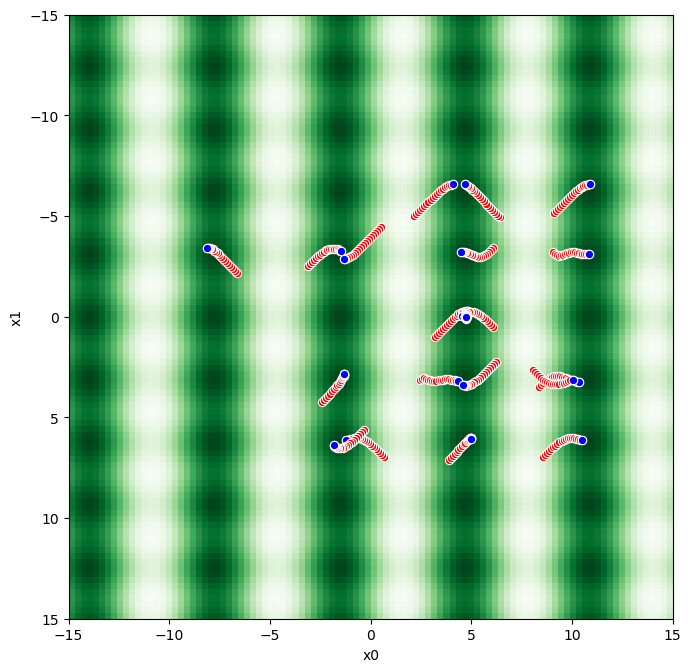

In [17]:
plot_random_train(
    S,
    tf.train.AdamOptimizer(learning_rate=0.1),
    experiments=20,
    iterations=20,
    side=30,
    seed=24
)

In [6]:
from tensorflow.keras import optimizers
?optimizers.Adam

Init signature:
optimizers.Adam(
    lr=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=None,
    decay=0.0,
    amsgrad=False,
    **kwargs,
)
Docstring:     
Adam optimizer.

Default parameters follow those provided in the original paper.

Arguments:
    lr: float >= 0. Learning rate.
    beta_1: float, 0 < beta < 1. Generally close to 1.
    beta_2: float, 0 < beta < 1. Generally close to 1.
    epsilon: float >= 0. Fuzz factor. If `None`, defaults to `K.epsilon()`.
    decay: float >= 0. Learning rate decay over each update.
    amsgrad: boolean. Whether to apply the AMSGrad variant of this
        algorithm from the paper "On the Convergence of Adam and
        Beyond".
File:           /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/optimizers.py
Type:           type
Subclasses:     
